## Feature Engineering for the Appeal column

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [2]:
df = pd.read_pickle('out/0/donations.pkl')

The total number of unique appeals is 403.  
We want to classify these into appeal categories.

### Workflow
Iterative workflow to get the right number of categories:  
Step 1: If we don't assign a category, assign it to 'Other' category.  
Step 2: Call describe_appeal_category on the suspect category that needs to be broken down.  
Step 3: Pick a suspect appeal-like value and call describe_appeal on the appeal.  
Step 4: If the results from step 3 show that the appeal has substantial number of donors and amount, then assign it to a separate category. Repeat again from step 1.  


In [3]:
#How many appeals are there?
len(df.appeal.unique())

403

In [4]:
def describe_appeal_category(appeal_category, by='amount'):
    '''
    Print summary of the top appeals by number of unique donors and total amount for this appeal category
    '''
    df_filter = (df.appeal_category == appeal_category)
    appeal_sizes = pd.concat(
        [df[df_filter].groupby(['appeal']).donor_id.nunique(),
         df[df_filter].groupby(['appeal']).amount.sum(),
         df[df_filter].groupby(['appeal']).size()], axis=1)\
        .rename(columns={0: 'number_of_donations'})

    common_appeals = list(set(appeal_sizes\
      .sort_values(by='donor_id', ascending=False)\
      .head(70).index).intersection
    (set(appeal_sizes\
      .sort_values(by='amount', ascending=False)\
      .head(70).index)))

    return appeal_sizes[appeal_sizes.index.isin(common_appeals)].sort_values(by=by, ascending=False)

In [5]:
def describe_appeal(appeal_like, appeal_category = None):
    '''
    Print summary of appeals given the appeal (like query) and appeal category
    '''
    appeal_filter = (df.appeal.str.contains(appeal_like, case=False))\
      & ((appeal_category == None) | (df.appeal_category == appeal_category))

    print 'Total amount: ', df[appeal_filter].amount.sum()
    print 'Fraction of total amount as donations: ', float(df[df.is_donation == True][appeal_filter].amount.sum())/df[appeal_filter].amount.sum()
    print 'Total number of donations: ', len(df[appeal_filter].amount)
    print 'Appeal Categories: ', df[appeal_filter].appeal_category.unique()
    print 'Number of unique donors: ', df[appeal_filter].donor_id.nunique()

    fig, axes = plt.subplots(1, 2, figsize=(12,6))
    
    df[appeal_filter].groupby(['appeal', 'is_donation'])\
    .donor_id.nunique().unstack().fillna(0)\
    .plot(kind='bar', ax=axes[0])\
    .set_title('Number of donors for appeal by is_donation flag')

    df[appeal_filter].groupby(['appeal', 'is_donation'])\
    .amount.sum().unstack().fillna(0)\
    .plot(kind='bar', ax=axes[1], figsize=(12,6))\
    .set_title('Total amount for appeal by is_donation flag')
    
    return df[appeal_filter]\
      .groupby(['appeal',])\
      .agg(
        {'amount': np.sum,
         'activity_ym': lambda x: [np.min(x), np.max(x), np.max(x) - np.min(x) + 1]
        })\
      .sort_values(by='amount', ascending=False)

In [6]:
#Step 1
df["appeal_category"] = np.nan

### These should come after the above
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Thankyou_'), 'appeal_category'] = 'Thankyou'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Shreya'), 'appeal_category'] = 'ShreyaGhosal'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('SonuNigam'), 'appeal_category'] = 'SonuNigam'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('SunidhiChauhan'), 'appeal_category'] = 'SunidhiChauhan'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Hariharan'), 'appeal_category'] = 'Hariharan'
df.loc[df.appeal.str.startswith('Ev_Shaan'), 'appeal_category'] = 'Shaan'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Funds_Volunteer'), 'appeal_category'] = 'Volunteer'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Givingcampaign'), 'appeal_category'] = 'Givingcampaign'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Sangam'), 'appeal_category'] = 'Sangam'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'CAR_Auction_City')), 'appeal_category'] = 'Car'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Car_CarProgramLLC')), 'appeal_category'] = 'Car'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_Web')), 'appeal_category'] = 'Funds_Web'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_Web_Groudspring')), 'appeal_category'] = 'Funds_Web'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_mail')), 'appeal_category'] = 'Funds_mail'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_AKKA2006_Mail')), 'appeal_category'] = 'Funds_mail'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_TV')), 'appeal_category'] = 'Funds_TV'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Banquet'), 'appeal_category'] = 'Banquet'
df.loc[df.appeal.str.startswith('Birthday'), 'appeal_category'] = 'Birthday'
df.loc[df.appeal.str.contains('_Walkathon'), 'appeal_category'] = 'Walkathon'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Event_Sevathon')), 'appeal_category'] = 'Sevathon'
df.loc[pd.isnull(df.appeal_category) & df.appeal.str.contains('Roshni'), 'appeal_category'] = 'Roshni'
df.loc[df.appeal.str.contains('booth', case=False), 'appeal_category'] = 'Booth'
df.loc[df.appeal.str.startswith('Capital_Project_'), 'appeal_category'] = 'Capital_Project'
df.loc[df.appeal.str.startswith('Yourcause_'), 'appeal_category'] = 'Yourcause'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_NL')), 'appeal_category'] = 'Funds_Newsletter'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_Friend')), 'appeal_category'] = 'Funds_Friend'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_Internet')), 'appeal_category'] = 'Funds_Internet'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_Repeat')), 'appeal_category'] = 'Funds_Repeat'
df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'Funds_Payroll')), 'appeal_category'] = 'Funds_Payroll'

dandia_filter = (pd.isnull(df.appeal_category)) & (df.appeal.str.contains('Dandia'))
dandia_donation = (df.is_donation==True) & dandia_filter
dandia_contribution = (df.is_donation==False) & dandia_filter

df.loc[dandia_donation, 'appeal_category'] = 'Dandia_Donation'
df.loc[dandia_contribution, 'appeal_category'] = 'Dandia_Contribution'

##### THESE ARE GENERIC AND MUST BE AT THE VERY END #####
df.loc[(pd.isnull(df.appeal_category) & df.appeal.str.contains('Event')), 'appeal_category'] = 'Event'
df.loc[(df.is_donation==True) & pd.isnull(df.appeal_category), 'appeal_category'] = 'Other_Donation'
df.loc[(df.is_donation==False) & pd.isnull(df.appeal_category), 'appeal_category'] = 'Other_Contribution'

print 'Number of categies: ', df.appeal_category.nunique()
print 'List of categories: ', sorted(df.appeal_category.unique())

Number of categies:  31
List of categories:  ['Banquet', 'Birthday', 'Booth', 'Capital_Project', 'Car', 'Dandia_Contribution', 'Dandia_Donation', 'Event', 'Funds_Friend', 'Funds_Internet', 'Funds_Newsletter', 'Funds_Payroll', 'Funds_Repeat', 'Funds_TV', 'Funds_Web', 'Funds_mail', 'Givingcampaign', 'Hariharan', 'Other_Contribution', 'Other_Donation', 'Roshni', 'Sangam', 'Sevathon', 'Shaan', 'ShreyaGhosal', 'SonuNigam', 'SunidhiChauhan', 'Thankyou', 'Volunteer', 'Walkathon', 'Yourcause']


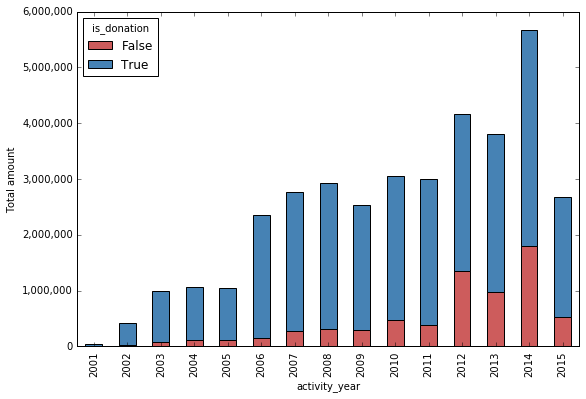

In [7]:
fig, ax = plt.subplots(1,1, figsize=(9,6))
colormap = ['indianred','steelblue']
thousands_formatter = FuncFormatter('{:,.0f}'.format)
df.groupby(['activity_year', 'is_donation']).amount.sum().unstack().plot(ax=ax, kind='bar', color=colormap, stacked=True)
ax.get_yaxis().set_major_formatter(thousands_formatter)
ax.set_ylabel('Total amount')

Total amount:  302086
Fraction of total amount as donations:  0.995117284482
Total number of donations:  442
Appeal Categories:  ['Banquet']
Number of unique donors:  366


/home/msharath/anaconda/lib/python2.7/site-packages/pandas/core/frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,amount,activity_ym
appeal,,
Event_Banquet_NY,146399,"[200411, 201312, 902]"
Event_Banquet_General,69146,"[200603, 200810, 208]"
Event_Banquet_FAP,49051,"[200310, 200409, 100]"
Event_Banquet_NJ,18321,"[201312, 201312, 1]"
Event_SoCal_Banquet,15169,"[201111, 201201, 91]"
Event_Banquet_GA,4000,"[200612, 200612, 1]"


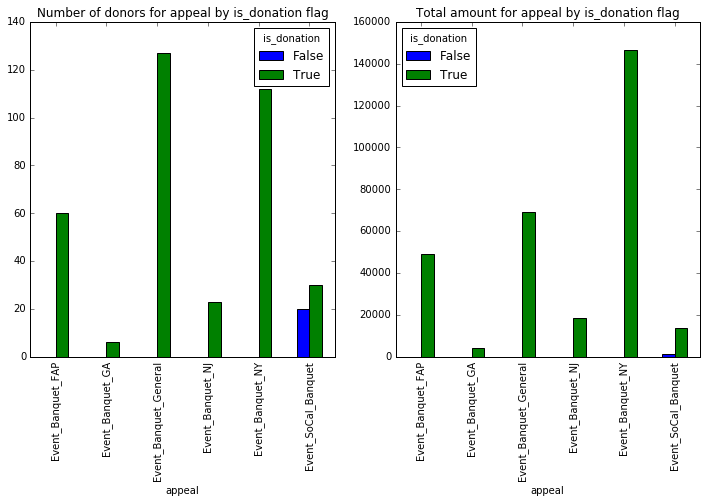

In [8]:
# Workflow

# Describe an appeal
describe_appeal('Event', 'Banquet')
#'' 'SonuNigam' '' '' ''
# '' 'Banquet' 'SunidhiChauhan' 'Dandia_Contribution' 'Hariharan'
# 'Sangam']
#Donations: Event, Walkathon, Roshni

# Assign the appeal to a category
#df.loc[(pd.isnull(df.appeal_category) & (df.appeal == 'CAR_Auction_City')), 'appeal_category'] = 'Car'

# Describe an appeal category
#describe_appeal_category('Banquet', by='amount')
#describe_appeal_category('Other_Contribution', by='donor_id')

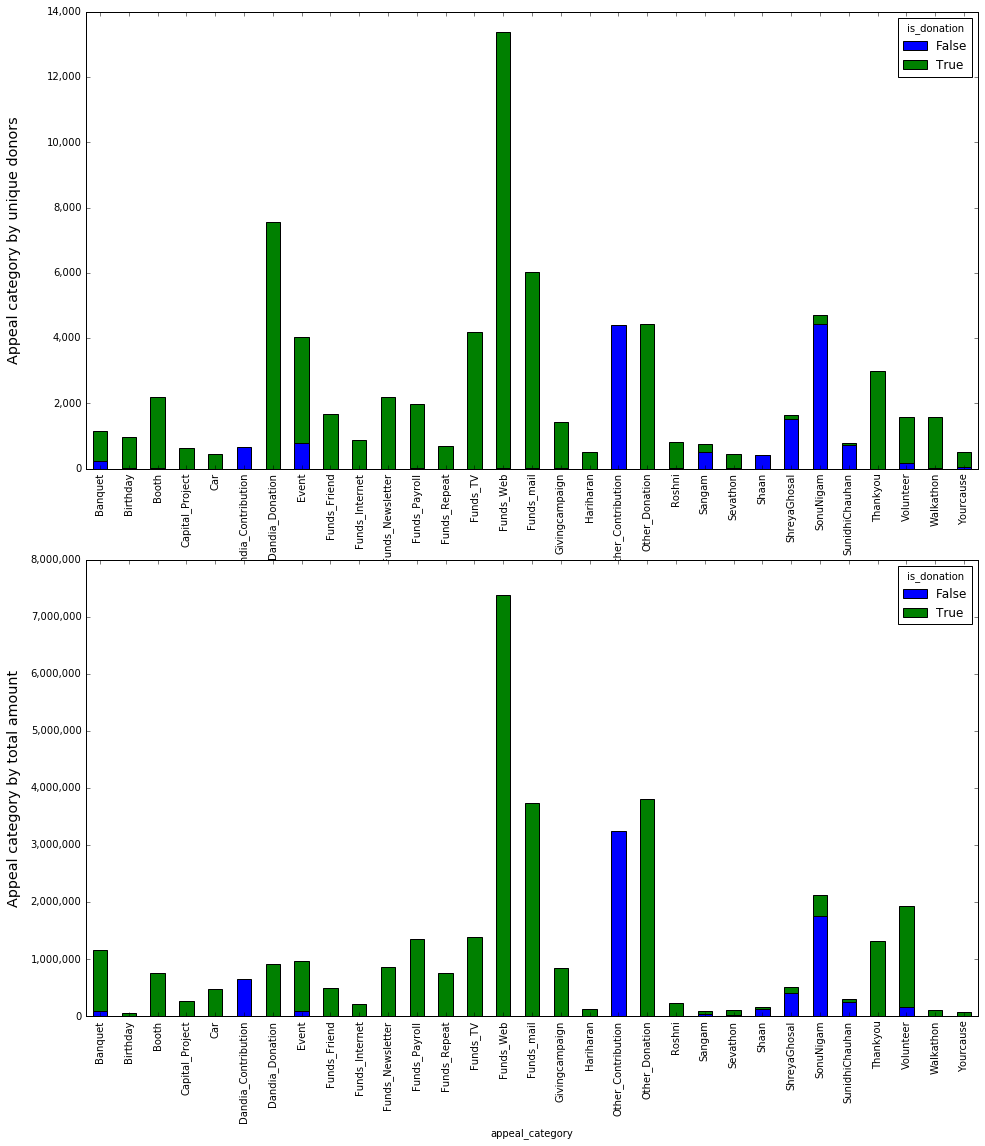

In [9]:
from matplotlib.ticker import FuncFormatter
fig, axes = plt.subplots(2, 1, figsize=(16,18))

appeal_cat_donations = df.groupby(['appeal_category','is_donation']).donor_id.nunique()
appeal_cat_donations.unstack().fillna(0).plot(kind='bar', ax=axes[0], stacked=True)
axes[0].text(-0.08, 0.5, 'Appeal category by unique donors',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        size='x-large',
        transform=axes[0].transAxes)

appeal_cat_donations = df.groupby(['appeal_category','is_donation']).amount.sum()
appeal_cat_donations.unstack().fillna(0).plot(kind='bar', ax=axes[1], stacked=True)
axes[1].text(-0.08, 0.5, 'Appeal category by total amount',
        horizontalalignment='center',
        verticalalignment='center',
        rotation='vertical',
        size='x-large',
        transform=axes[1].transAxes)


# Add a thousands separator on the y axis
for ax in axes:
    ax.get_yaxis().set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))

In [10]:
!mkdir -p out/10
df.to_pickle('out/10/donations.pkl')